# Tugas Ho 2
**Nama**: Elsa Elisa Yohana Sianturi  
**NIM**: 122140135  

1. Kamu adalah seorang intern pada sebuah perusahaan teknologi kesehatan. Perusahaan tersebut sedang mengembangkan teknologi wearable untuk mendeteksi detak jantung berdasarkan sinyal PPG (Photoplethysmography), yakni sinyal aliran darah dari jantung ke tangan. Kamu akan mensimulasikan sinyal PPG menggunakan library `neurokit2.ppg_simulate` dengan parameter sebagai berikut:

    - **Durasi**: Berdasarkan 3 digit terakhir NIM Anda.
    - **Sampling Rate**: 150 Hz.
    - **Noise Level**: 0.<2 digit NIM terakhir> → 0.35.
    - **Heart Rate**: 80 Beat Per Minute (BPM).
    - **Random State**: Tanggal bulan tahun lahir Anda dengan format YYMMD. --> 031209 (09 Desember 2003)

a. Buktikanlah bahwa proses downsampling pada sinyal PPG akan menghilangkan informasi dari sinyal asli. Lakukan downsampling dari 150 Hz ke 100 Hz, 50 Hz, 25 Hz, 10 Hz, hingga 5 Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs), maka sinyal akan semakin terdistorsi dan terdapat aliasing pada sinyal hasil downsampling. Jelaskan apa itu aliasing.

b. Ketika kamu melakukan filtering, terdapat parameter `order` saat kamu melakukan filtering. Apa maksudnya dari order dan apa yang akan terjadi jika kamu mengganti nilai order terhadap sinyal?

### Membuat Sinyal PPG


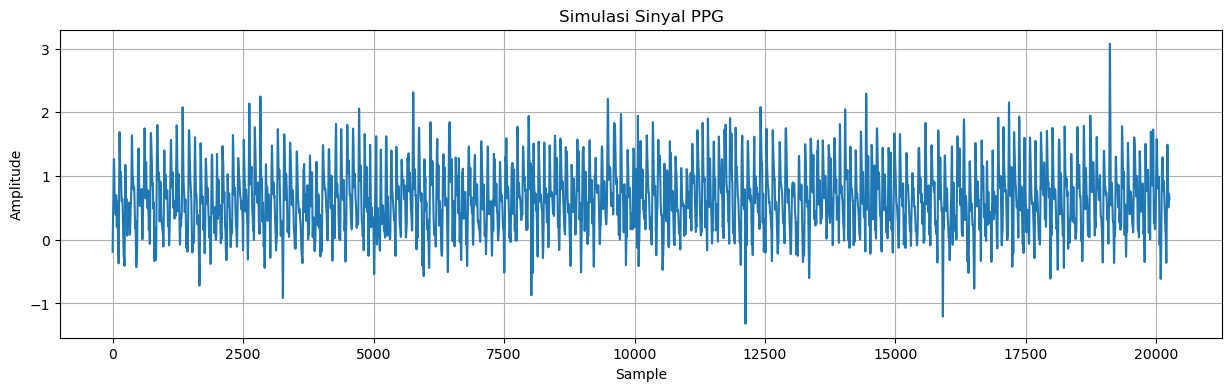

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Set parameter
duration = 135  #NIM terakhir 135 (122140135)
sampling_rate = 150  # in Hz
noise = 0.35  # 0.(2 digit nim terakhir dari nim) 0.35
heart_rate = 80  # in BPM
random_state = 31209  # menggunakan tanggal lahir, bulan, tahun lahir (yymmdd) --> 09 desember 2003 # (yymmdd) --> 031209

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(
    duration=duration,
    sampling_rate=sampling_rate,
    heart_rate=heart_rate,
    random_state=random_state
)

# Tambahkan noise ke sinyal
ppg_signal = nk.signal_distort(ppg_signal, noise_amplitude=noise)

# Plot hasil simulasi
plt.figure(figsize=(15, 4))
plt.plot(ppg_signal)
plt.title('Simulasi Sinyal PPG')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


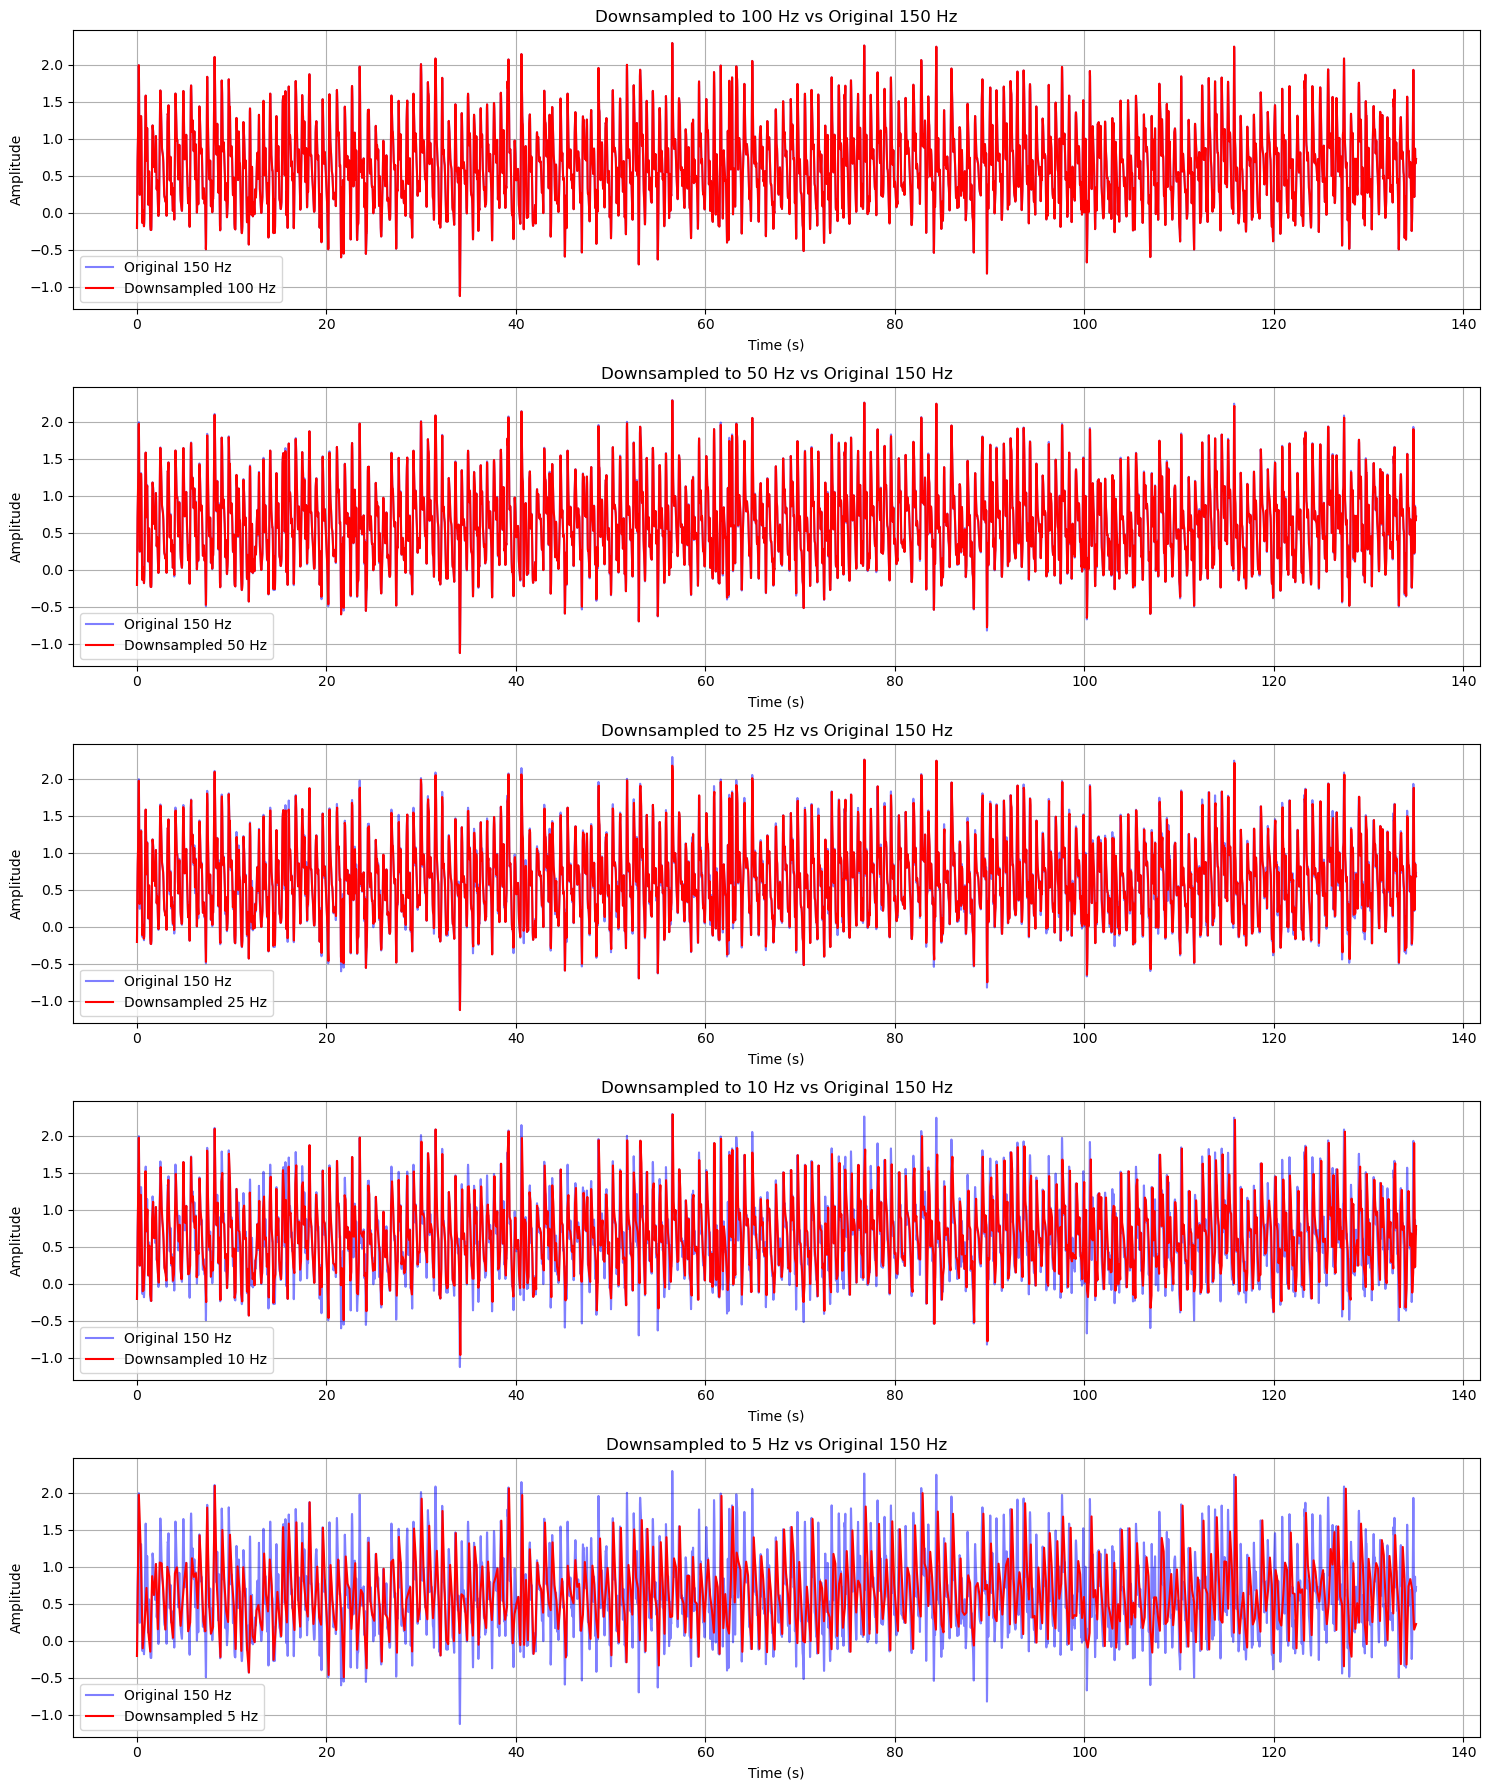

In [11]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt


# Set parameter
duration = 135  #NIM terakhir 135 (122140135)
sampling_rate = 150  # in Hz
noise = 0.35  # 0.(2 digit nim terakhir dari nim) 0.35
heart_rate = 80  # in BPM
random_state = 31209  # menggunakan tanggal lahir, bulan, tahun lahir (yymmdd) --> 09 desember 2003 # (yymmdd) --> 031209

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(
    duration=duration,
    sampling_rate=sampling_rate,
    heart_rate=heart_rate,
    random_state=random_state
)

# Tambahkan noise ke sinyal
ppg_signal = nk.signal_distort(ppg_signal, noise_amplitude=noise)

# Fungsi downsampling
def downsample(signal, original_fs, target_fs):
    factor = int(original_fs / target_fs)
    return signal[::factor]

# Daftar sampling rate target
target_fs_list = [100, 50, 25, 10, 5]

# Downsampling sinyal
ppg_downsampled = {}
time_downsampled = {}

# Vektor waktu asli
time_original = np.linspace(0, duration, len(ppg_signal))

for fs in target_fs_list:
    ppg_downsampled[fs] = downsample(ppg_signal, sampling_rate, fs)
    time_downsampled[fs] = np.linspace(0, duration, len(ppg_downsampled[fs]))

# Visualisasi
plt.figure(figsize=(15, 18))

# Plot sinyal original untuk referensi (di setiap plot)
for idx, fs in enumerate(target_fs_list, start=1):
    plt.subplot(len(target_fs_list), 1, idx)
    plt.plot(time_original, ppg_signal, label="Original 150 Hz", color='blue', alpha=0.5)  # sinyal asli (transparan)
    plt.plot(time_downsampled[fs], ppg_downsampled[fs], label=f"Downsampled {fs} Hz", color='red')
    plt.title(f"Downsampled to {fs} Hz vs Original 150 Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Analisis Distorsi dan Aliasing pada Downsampling

Berdasarkan visualisasi sinyal hasil downsampling, berikut hasil analisis berdasarkan visualiasi sinyal hasil downsampling yang telah dilakukan:

1. **Distorsi Sinyal**:
    - Ketika frekuensi sampling diturunkan, jumlah sampel yang digunakan untuk merepresentasikan sinyal asli berkurang. Hal ini menyebabkan detail dari sinyal asli hilang, sehingga sinyal hasil downsampling menjadi kurang akurat.
    - Pada frekuensi sampling yang lebih tinggi yaitu 100 Hz, sinyal hasil downsampling masih cukup mirip dengan sinyal asli. Namun, pada fs yang lebih rendah yaitu 5 Hz, sinyal menjadi semakin kasar, kehilangan detail penting, dan bentuknya  menyimpang dari sinyal asli.

2. **Aliasing**:
    - Aliasing adalah fenomena di mana frekuensi tinggi dalam sinyal asli tidak dapat direpresentasikan dengan benar setelah downsampling, sehingga muncul sebagai frekuensi rendah yang tidak ada dalam sinyal asli.
    - Pada fs yang sangat rendah yaitu 5 Hz, sinyal hasil downsampling menunjukkan pola yang tidak sesuai dengan sinyal asli. Ini adalah bukti bahwa aliasing telah terjadi.
    - Aliasing terjadi karena frekuensi sampling yang  tidak memenuhi kriteria Nyquist, yaitu fs harus setidaknya dua kali lipat dari frekuensi tertinggi dalam sinyal asli. Jika fs terlalu rendah, informasi frekuensi tinggi "terlipat" menjadi frekuensi rendah, menyebabkan distorsi yang tidak dapat diperbaiki.

3. **Observasi Visualisasi sinyal hasil downsampling**:
    - Pada fs = 100 Hz, sinyal hasil downsampling masih cukup halus dan menyerupai sinyal asli.
    - Pada fs = 50 Hz, sinyal mulai kehilangan beberapa detail, tetapi masih dapat dikenali.
    - Pada fs = 25 Hz, sinyal mulai menunjukkan distorsi yang lebih signifikan, dengan detail yang semakin berkurang.
    - Pada fs = 10 Hz, sinyal menjadi sangat kasar, dan pola yang tidak ada dalam sinyal asli mulai muncul.
    - Pada fs = 5 Hz, sinyal menjadi sangat terdistorsi, dengan pola yang tidak sesuai dengan sinyal asli, menunjukkan adanya aliasing.

### Kesimpulan
Semakin rendah sampling frequency (fs), sinyal akan semakin terdistorsi karena kehilangan detail penting. Pada fs yang sangat rendah, aliasing terjadi, menyebabkan munculnya pola yang tidak ada dalam sinyal asli. Oleh karena itu, penting untuk memilih fs yang cukup tinggi untuk merepresentasikan sinyal asli dengan akurat dan menghindari aliasing.